# SYR Figure SPM.2c - Rx1day map

See also:
- [Figure_11.16_Rx1day_map](Figure_11.16_Rx1day_map.ipynb) (same figure with slightly different layout for AR6 WGI Chapter 11)

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import conf
from utils import computation, plot, save_figuredata, syr_colors

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.sans-serif'] = "Liberation Sans Narrow"
mpl.rcParams['font.sans-serif'] = "Arial"

In [2]:
FIGURE_FOLDER = "SYR_Figure_SPM.2c_Rx1day_map"

plot.create_figure_folders(FIGURE_FOLDER, conf.cmip6)

## Load data

### global mean tas

In [3]:
c6_tas = conf.cmip6.load_post_all_concat(
    varn="tas",
    postprocess="global_mean"
)

 -- {'varn': 'tas', 'postprocess': 'global_mean', 'table': 'Amon', 'model': 'IITM-ESM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2098)


In [4]:
c6_rx1day = conf.cmip6.load_post_all_concat(
    varn="pr", postprocess="rx1day_regrid", anomaly="no_anom"
)

-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'AWI-CM-1-1-MR', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'AWI-CM-1-1-MR', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p5f2', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'AWI-CM-1-1-MR', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
 -- {'varn': 'pr', 'postprocess': 'rx1day_regrid', 'table': 'day', 'model': 'BCC-ESM1', 'exp': 'ssp37

In [5]:
c6_rx1day_abs = computation.process_datalist(
    computation.calc_anomaly, c6_rx1day, start=1850, end=1900, how="absolute"
)

c6_rx1day_rel = computation.process_datalist(
    computation.calc_anomaly, c6_rx1day, start=1850, end=1900, how="relative"
)

In [6]:
warming_levels_4 = [1.5, 2.0, 3.0, 4.0]

c6_at_warming_rx1day_abs_4 = computation.at_warming_levels_list(
    c6_tas, c6_rx1day_abs, warming_levels=warming_levels_4
)

c6_at_warming_rx1day_rel_4 = computation.at_warming_levels_list(
    c6_tas, c6_rx1day_rel, warming_levels=warming_levels_4
)

## Plot

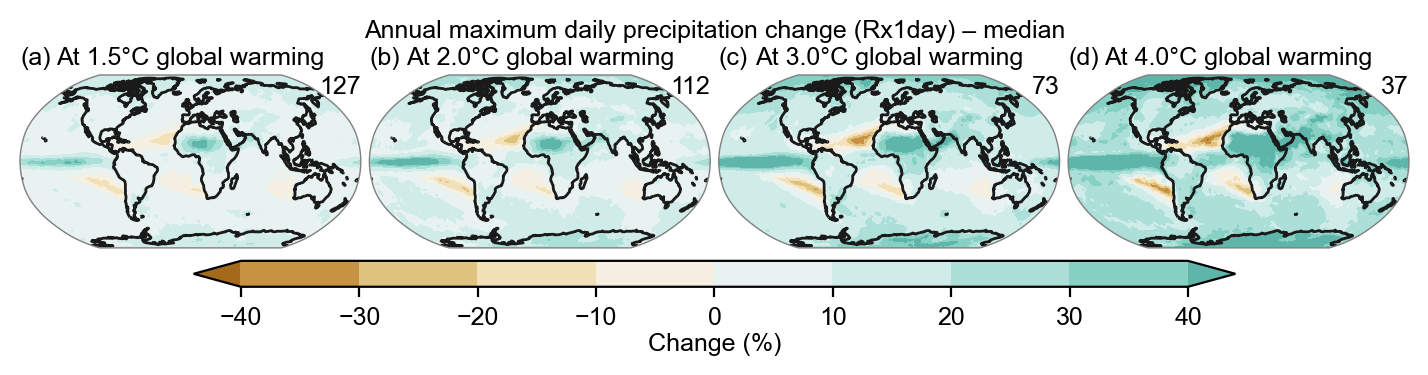

In [7]:
levels = np.arange(-40, 41, 10)
varn = "Rx1day"

# levels = None
cbar = plot.at_warming_level_one_4(
    c6_at_warming_rx1day_rel_4,
    "Change (%)",
    "Annual maximum daily precipitation change (Rx1day)",
    levels=levels,
    average="median",
    colorbar=True,
    robust=True,
    cmap=syr_colors.cmap,
    skipna=False,
    add_legend=False,
    hatch_simple=None,
    plotfunc="contourf",
    #     mask_ocean=True,
)

fN = conf.cmip6.figure_filename(
    f"SYR_Figure_SPM.2c_cmip6_{varn}", FIGURE_FOLDER, add_prefix=False
)
plt.savefig(fN + ".pdf", dpi=300)
plt.savefig(fN + ".svg", dpi=300)
plt.savefig(fN + ".eps", dpi=300)
plt.savefig(fN + ".png", dpi=300, transparent=False, facecolor="w")

# ================================

# save figure data

sfd = save_figuredata.SaveFiguredata(
    figure="SYR_Figure_SPM.2c",
    units="%",
    varn=varn,
)

for i, warming_level in enumerate([1.5, 2.0, 3.0, 4.0]):

    fN = conf.cmip6.figure_filename(
        f"SYR_Figure_SPM.2c_cmip6_{varn}_change_at_{warming_level:0.1f}C.nc",
        FIGURE_FOLDER,
        "figure_data",
        add_prefix=False,
    )

    da = c6_at_warming_rx1day_rel_4[i]
    da.attrs["long_name"] = "Annual maximum 1-day precipitation"
    da.attrs["comment"] = "anomaly wrt 1850-1900"

    ds = sfd.map_panel(
        da=da,
        average="median",
        panel="c",
        warming_level=warming_level,
    )
    ds.to_netcdf(fN)